# **Video Games Sales Analysis**

This notebook provides an exploratory data analysis of video games sales. We aim to uncover insights that can help optimize sales strategies.

## **Import Libraries**

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

import warnings
warnings.filterwarnings('ignore')

## **Basic Understanding of The Data**

In [4]:
# Import Data & show sample

df = pd.read_csv('/content/vgchartz-2024.csv')
df.sample(5)

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
51744,/games/boxart/full_9302095AmericaFrontccc.jpg,The Legend of Heroes: Trails through Daybreak,PC,Role-Playing,Unknown,Nihon Falcom Corporation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-09-21
38083,/games/boxart/default.jpg,Stonehearth,OSX,Misc,SIMS Co.,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,2020-12-31,NaN
2770,/games/boxart/8941359ccc.jpg,Smurf: Rescue In Gargamel's Castle,2600,Action,Coleco,Coleco,NaN,0.59,0.55,NaN,0.03,0.01,1982-01-01,NaN
12906,/games/boxart/full_4540221JapanFrontccc.jpg,DokiDoki Majo Shinpan!,DS,Adventure,SNK Playmore,SNK Playmore Corporation,NaN,0.05,NaN,0.05,NaN,NaN,2007-07-05,NaN
60061,/games/boxart/full_2304383JapanFrontccc.jpg,Super Kyousouba: Kaze no Silpheed,SNES,Sports,King Records,King Records,NaN,NaN,NaN,NaN,NaN,NaN,1993-10-08,NaN


## **Data Exploration**

In [5]:
# Show Data Rows & Features Number
print("Total Rows :", df.shape[0])
print("Total Features :", df.shape[1])

Total Rows : 64016
Total Features : 14


In [6]:
# Check duplicated value
df.duplicated().sum()

0

In [7]:
# Show Data Info

list_item = []
for col in df.columns:
    list_item.append([col, df[col].dtype, df[col].isna().sum(), 100*df[col].isna().sum()/len(df[col]), df[col].nunique(), df[col].unique()[:5]])
desc_df = pd.DataFrame(data=list_item, columns='Feature,Data Type,Null, Null (%),Unique,Unique Sample'.split(","))
desc_df

,Feature,Data Type,Null,Null (%),Unique,Unique Sample
0,img,object,0,0.000000,56177,[/games/boxart/full_6510540AmericaFrontccc.jpg...
1,title,object,0,0.000000,39798,"[Grand Theft Auto V, Grand Theft Auto: Vice Ci..."
2,console,object,0,0.000000,81,"[PS3, PS4, PS2, X360, XOne]"
3,genre,object,0,0.000000,20,"[Action, Shooter, Action-Adventure, Sports, Ro..."
4,publisher,object,0,0.000000,3383,"[Rockstar Games, Activision, EA Sports, Electr..."
5,developer,object,17,0.026556,8862,"[Rockstar North, Treyarch, Infinity Ward, Rock..."
6,critic_score,float64,57338,89.568233,89,"[9.4, 9.7, 9.6, nan, 8.1]"
7,total_sales,float64,45094,70.441765,482,"[20.32, 19.39, 16.15, 15.86, 15.09]"
8,na_sales,float64,51379,80.259623,320,"[6.37, 6.06, 8.41, 9.06, 6.18]"
9,jp_sales,float64,57290,89.493252,121,"[0.99, 0.6, 0.47, 0.06, 0.41]"


## **Data Preprocessing**

### **Handle missing values**

In [9]:
# Option 1: Drop rows with missing critical information (e.g., title, console, total_sales)
df.dropna(subset=['title', 'console', 'total_sales'], inplace=True)

# Option 2: Fill missing values for non-critical fields (e.g., critic_score)
df['critic_score'].fillna(df['critic_score'].mean(), inplace=True)

### **Convert data types**

In [10]:
# Convert release_date to datetime
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

## **Feature engineering**

In [30]:
# Calculate the total number of sales in all regions for cross-verification
df['calculated_total_sales'] = df['na_sales'] + df['jp_sales'] + df['pal_sales'] + df['other_sales']

# Extract year and month from release_date
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

## **Identify and handle outliers**

In [12]:
# Assuming critic_score should be between 0 and 10
df = df[(df['critic_score'] >= 0) & (df['critic_score'] <= 10)]

# Step 6: Normalize or scale numerical features (Optional)
# For example, we can normalize total_sales if needed
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df['total_sales_normalized'] = scaler.fit_transform(df[['total_sales']])

# Print the resulting DataFrame
df.head()

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update,calculated_total_sales,total_sales_normalized
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.40000,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN,20.33,1.000000
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.70000,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03,19.39,0.954232
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.60000,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN,16.15,0.794783
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,7.10189,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN,15.87,0.780512
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.10000,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14,15.08,0.742618


## **Exploratory Data Analysis**

In [18]:
# Define a function to display plots
def display_plot(title):
    plt.title(title)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## **Top-Selling Titles Worldwide**

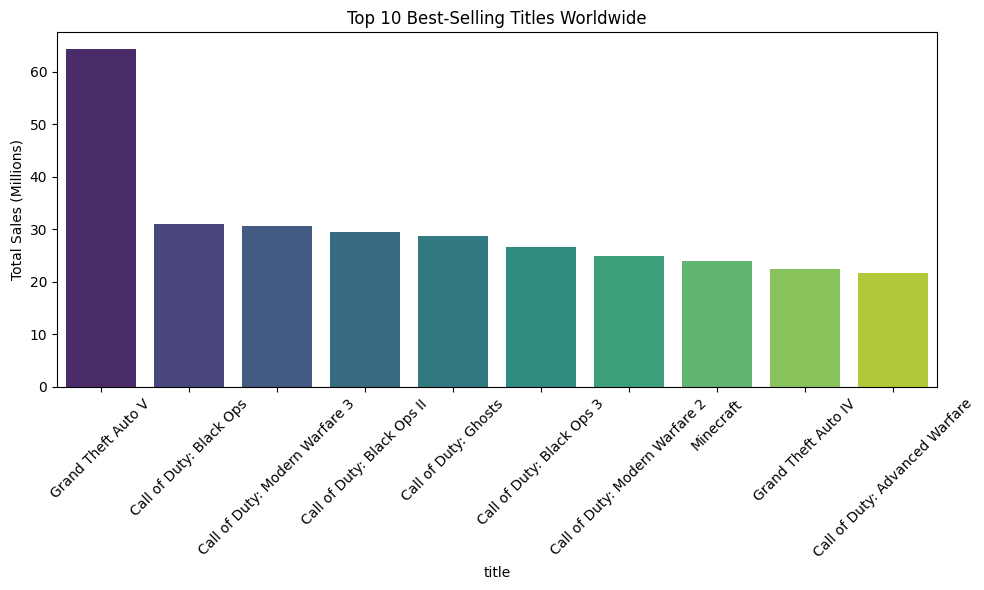

In [19]:
top_selling_titles = df[['title', 'total_sales']].groupby('title').sum().sort_values(by='total_sales', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_selling_titles.index, y=top_selling_titles['total_sales'], palette='viridis')
plt.ylabel('Total Sales (Millions)')
display_plot('Top 10 Best-Selling Titles Worldwide')

## Top 10 Best-Selling Titles Worldwide

The bar chart displays the **top 10 best-selling video games** globally based on total sales:

- **Grand Theft Auto V** is the standout leader, with sales surpassing **60 million copies**. Its success is due to its broad appeal and continuous updates.

- The **Call of Duty** franchise dominates the list, with multiple entries like **Black Ops**, **Modern Warfare 3**, and **Black Ops II**, each selling over **20 million copies**. This shows the franchise's consistent popularity.

- **Minecraft** is notable for its unique appeal as a sandbox game, attracting a wide audience with its creativity and community-driven content.

- **Open-world** and **first-person shooter** games remain popular, as seen with the success of titles like **Grand Theft Auto V** and several **Call of Duty** entries.

- **Recommendation:** Developers should focus on high-quality open-world and shooter games, emphasizing engaging gameplay and regular updates. Exploring sandbox genres like **Minecraft** can also capture diverse audiences.


## **Year with the Highest Sales and Industry Growth Over Time**

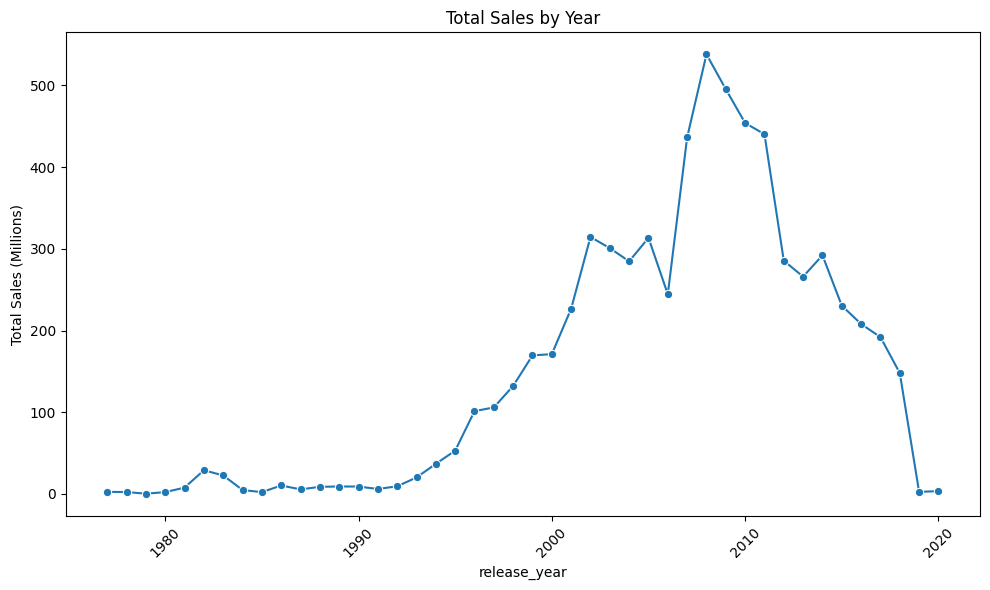

In [24]:
annual_sales = df.groupby('release_year')['total_sales'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=annual_sales.index, y=annual_sales, marker='o', linestyle='-')
plt.ylabel('Total Sales (Millions)')
display_plot('Total Sales by Year')

## Total Sales by Year

The line chart above shows the **total video game sales** by year, highlighting trends in the industry:

- **1980s to Early 2000s:** Sales were relatively stable with gradual growth, reflecting the early development stages of the video game industry.

- **Mid-2000s Boom:** There was a significant surge in sales, peaking around **2009**, driven by popular consoles and blockbuster game releases.

- **Post-2010 Decline:** After the peak, sales began to decline, possibly due to market saturation, increased competition, and shifts toward digital sales models.

- **Recent Years:** Sales have continued to decrease, indicating challenges in maintaining the same level of growth as during the mid-2000s.

- **Recommendation:** Industry players should explore new strategies, such as focusing on digital distribution, subscription services, and innovative game genres, to adapt to changing market conditions and revitalize growth.


## **Industry growth over time**

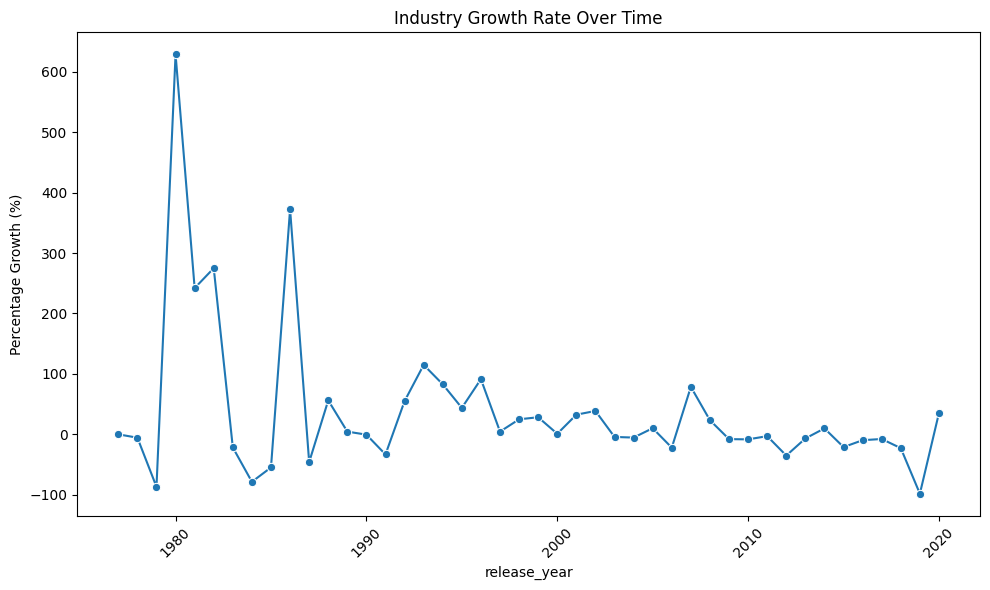

In [25]:
sales_growth = annual_sales.pct_change().fillna(0) * 100

plt.figure(figsize=(10, 6))
sns.lineplot(x=sales_growth.index, y=sales_growth, marker='o', linestyle='-')
plt.ylabel('Percentage Growth (%)')
display_plot('Industry Growth Rate Over Time')

## Industry Growth Rate Over Time

The line chart illustrates the **year-over-year growth rate** in the video game industry:

- **Early Volatility:** The industry experienced high volatility in growth rates during the late **1970s and early 1980s**, indicative of the nascent stage and rapid expansion of the gaming market.

- **1980s Peaks:** There were several sharp spikes in growth, reflecting bursts of innovation and new console releases that drove significant sales increases.

- **1990s Stabilization:** Growth rates began to stabilize in the **1990s**, with more consistent annual changes as the market matured and became more competitive.

- **Post-2000 Fluctuations:** The **2000s** saw varied growth rates, influenced by the release of major consoles, hit games, and emerging digital trends.

- **Recent Trends:** In the last decade, growth has been modest, with occasional dips likely due to market saturation and shifting consumer preferences.

- **Recommendation:** To achieve sustainable growth, the industry should focus on emerging technologies, including virtual reality (VR) and cloud gaming, while also exploring diverse business models like subscriptions and live service games.


## **Console Specialization in Particular Genres**

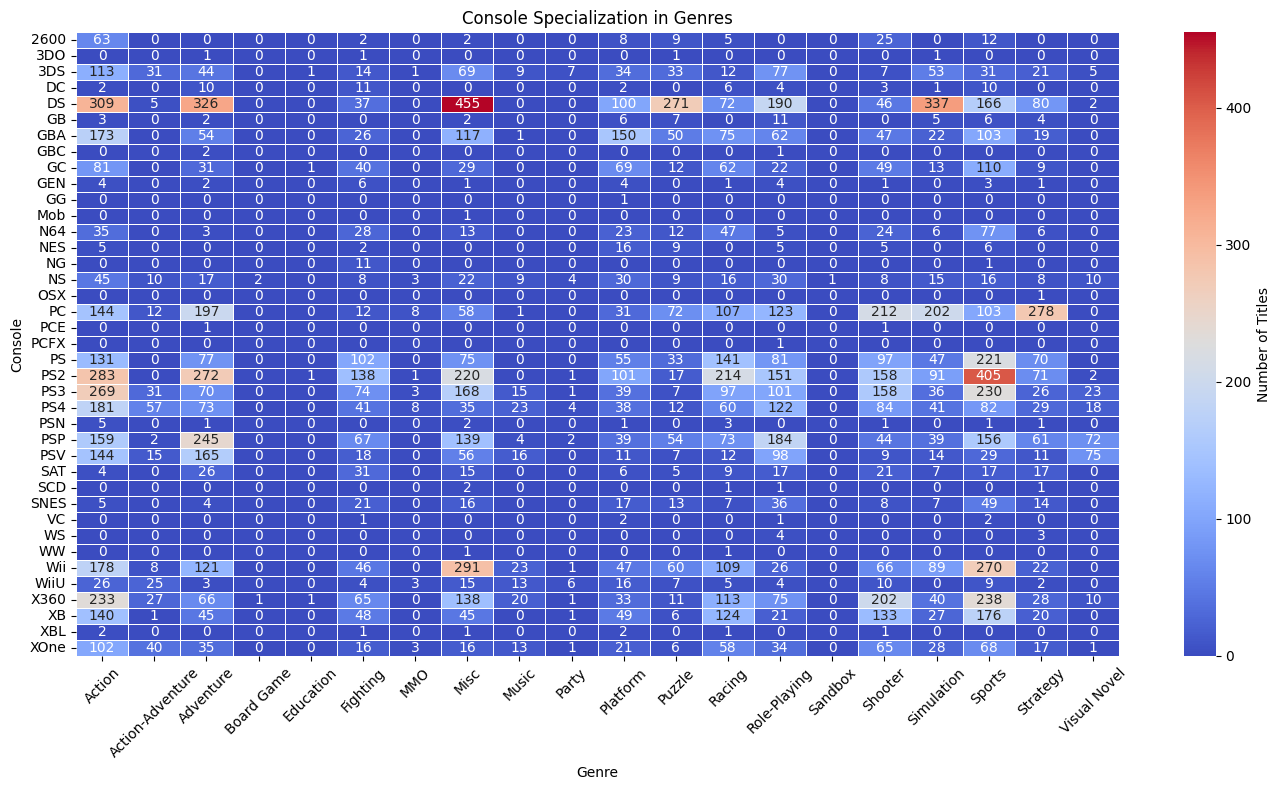

In [27]:
console_genre = df.groupby(['console', 'genre']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(console_genre, cmap='coolwarm', linewidths=0.5, annot=True, fmt='.0f', cbar_kws={'label': 'Number of Titles'})
plt.ylabel('Console')
plt.xlabel('Genre')
display_plot('Console Specialization in Genres')

## Console Specialization in Genres

The heatmap visualizes the number of game titles across various genres for different consoles:

- **PlayStation 2 (PS2):** Exhibits a strong presence across multiple genres, particularly in **Role-Playing**, **Action**, and **Sports**. The PS2's diverse game library is one reason for its success.

- **Nintendo DS (DS):** Specializes in **Puzzle** and **Role-Playing** genres, reflecting Nintendo's focus on family-friendly and innovative gameplay experiences.

- **PC Platform:** Dominates in **Strategy**, **Simulation**, and **Shooter** genres, showcasing the platform's versatility and appeal to various gaming audiences.

- **Xbox 360 (X360):** Strong in **Shooter** and **Racing** games, indicating a focus on action-packed and competitive gaming experiences.

- **Nintendo Wii:** Specializes in **Party** and **Fitness** games, catering to casual gamers and families, which helped broaden the gaming audience.

- **Recommendation:** Developers should consider targeting specific genres that align with console strengths to maximize appeal and sales. For example, focusing on action and sports games for PlayStation or party games for Nintendo platforms could enhance market success.


## **Critic Scores vs. Sales**

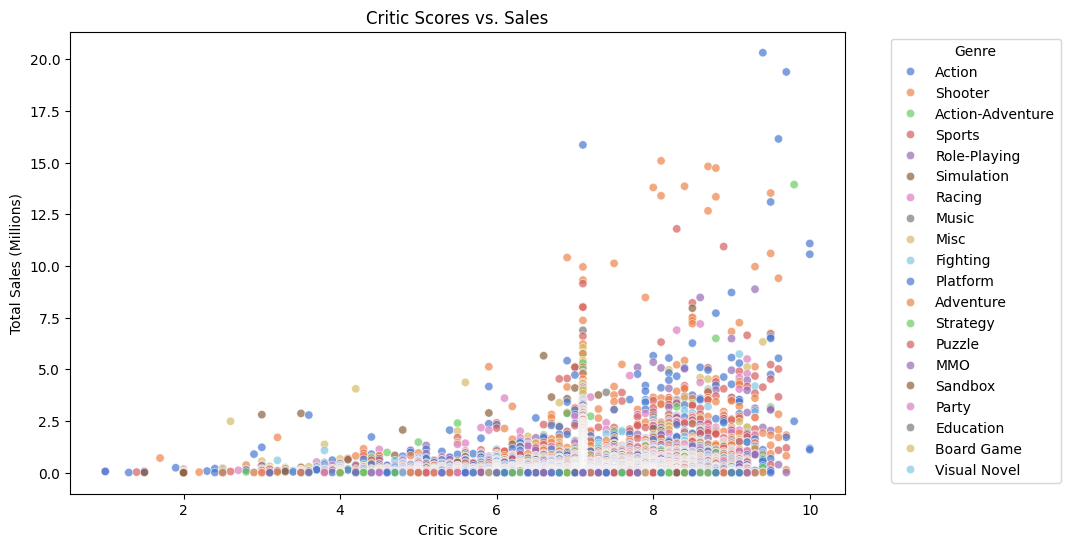

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='critic_score', y='total_sales', data=df, hue='genre', palette='muted', alpha=0.7)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (Millions)')
plt.title('Critic Scores vs. Sales')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Critic Scores vs. Sales

The scatter plot illustrates the relationship between **critic scores** and **total sales** across various game genres:

- **Positive Correlation:** Generally, there is a positive correlation between critic scores and sales. Games with higher critic scores tend to have higher sales, indicating the importance of quality and critical acclaim.

- **High Scoring Games:** Titles with scores above **8** tend to see a significant increase in sales, especially in genres like **Action**, **Shooter**, and **Sports**. These genres often benefit from high production values and broad appeal.

- **Low Scoring Games:** Games with low critic scores (below **4**) generally experience low sales across all genres, emphasizing the potential impact of poor reviews on a game's commercial performance.

- **Genre Differences:**
  - **Shooter** and **Action** games with moderate scores still achieve notable sales, suggesting a strong existing fan base or brand loyalty.
  - **Sports** and **Role-Playing** games also show high sales at higher scores, highlighting the importance of quality and innovation in these genres.

- **Recommendation:** Developers should focus on improving game quality to achieve higher critic scores, which can lead to increased sales. Emphasizing gameplay innovation and narrative depth can help titles stand out in competitive genres like Action and Shooter.


## **Sales Distribution Across Regions**

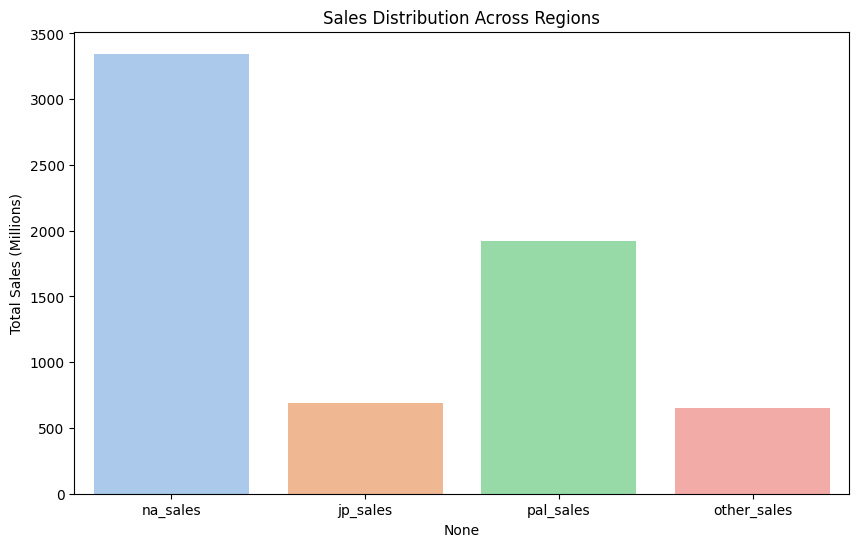

In [34]:
region_sales = df[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum()

plt.figure(figsize=(10, 6))
sns.barplot(x=region_sales.index, y=region_sales.values, palette='pastel')
plt.ylabel('Total Sales (Millions)')
plt.title('Sales Distribution Across Regions')
plt.show()

## Sales Distribution Across Regions

The bar chart presents the total video game sales distribution across major regions:

- **North America (NA):** This region leads with the highest sales, contributing significantly to the global market. This highlights North America as a critical market for video game sales.

- **PAL Regions:** PAL regions (which include Europe, Australia, and parts of Asia) show substantial sales, making them the second-largest market. Localizing games and understanding regional preferences can further tap into this market's potential.

- **Japan (JP):** While Japan has a smaller share compared to NA and PAL regions, it remains an important market, especially for certain genres and franchises with a strong cultural affinity.

- **Other Regions:** These regions, which encompass the rest of the world, have the smallest share but offer growth opportunities, particularly in emerging markets.

- **Recommendation:** Companies should focus their marketing and distribution strategies on North America and PAL regions while exploring growth opportunities in Japan and other emerging markets. Tailoring game content to suit regional preferences can enhance market penetration and sales performance.


## **Publisher Performance**

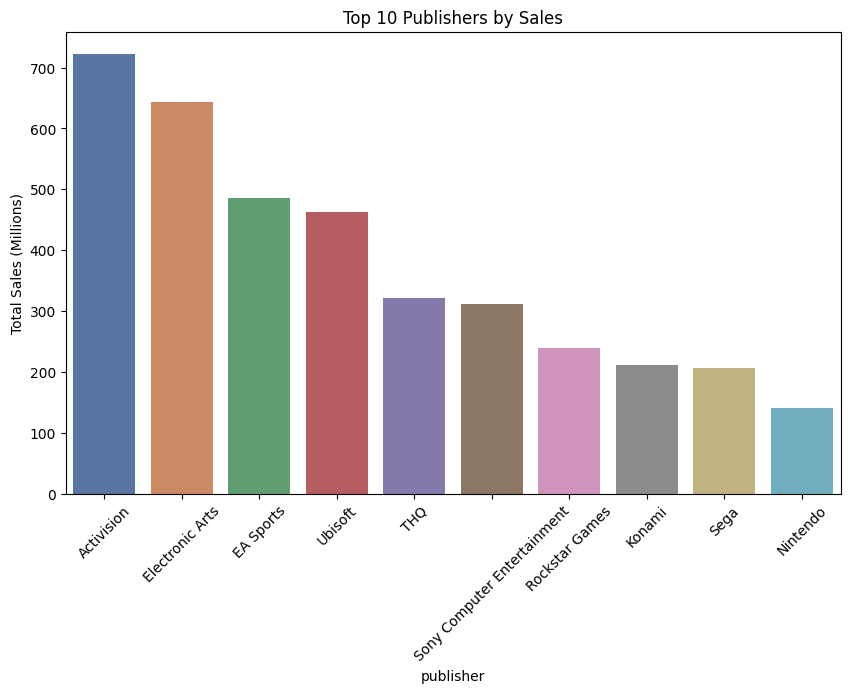

In [35]:
top_publishers = df.groupby('publisher')['total_sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_publishers.index, y=top_publishers.values, palette='deep')
plt.xticks(rotation=45)
plt.ylabel('Total Sales (Millions)')
plt.title('Top 10 Publishers by Sales')
plt.show()

## Top 10 Publishers by Sales

The bar chart highlights the total sales (in millions) for the top 10 video game publishers:

- **Activision:** Leads the chart with over 700 million in sales, indicating its dominant position in the market.
  
- **Electronic Arts:** Follows as a close second, with sales around 650 million, showcasing its strong foothold in the industry.

- **Mid-Tier Publishers:** EA Sports, Ubisoft, and THQ have sales ranging between 300 to 500 million, reflecting a competitive middle tier. These companies have a few highly successful titles or a broad portfolio of games.

- **Smaller Players:** Rockstar Games, Konami, Sega, and Nintendo, despite having lower sales (200 to 300 million), remain significant in the industry. They likely focus on niche markets or have fewer but highly popular games.

- **Recommendation:** Activision and Electronic Arts should continue to invest in their successful franchises and explore new markets. Mid-tier publishers should diversify their game portfolios to compete more effectively. Smaller publishers might benefit from strategic partnerships or acquisitions to boost their market share. All publishers should prioritize innovation and the development of new game titles to stay relevant in the industry.


# Summary Insight & Recommendations

### Summary Insight

1. **Top-Selling Titles:**
   - **Grand Theft Auto V** leads in global sales, followed by multiple **Call of Duty** titles and **Minecraft**. This highlights the enduring appeal of open-world and shooter genres.

2. **Sales Trends Over Time:**
   - The video game industry experienced significant growth peaking around **2009**, followed by a gradual decline. This suggests a need for innovation to revitalize growth.

3. **Industry Growth Rate:**
   - Growth rates have fluctuated, with notable peaks and troughs. Recent years show modest growth, indicating market saturation and evolving consumer preferences.

4. **Console Specialization:**
   - Different consoles excel in specific genres:
     - **PlayStation 2**: Strong in **Action**, **Role-Playing**, and **Sports**.
     - **Nintendo DS**: Focuses on **Puzzle** and **Role-Playing**.
     - **PC**: Dominates in **Strategy**, **Simulation**, and **Shooter** genres.
     - **Xbox 360**: Notable in **Shooter** and **Racing**.
     - **Nintendo Wii**: Popular for **Party** and **Fitness** games.

5. **Critic Scores vs. Sales:**
   - Higher critic scores generally correlate with higher sales. Games with high ratings are more likely to achieve commercial success.

6. **Sales Distribution Across Regions:**
   - **North America** leads in sales, followed by **PAL regions** and **Japan**. Emerging markets still offer growth potential.

7. **Top 10 Publishers by Sales:**
   - **Activision** leads with over 700 million in sales, showcasing its market dominance.
   - **Electronic Arts** follows closely with around 650 million, emphasizing its strong position.
   - **Mid-Tier Publishers** like EA Sports, Ubisoft, and THQ have sales between 300 to 500 million, reflecting a competitive landscape.
   - **Smaller Players** such as Rockstar Games, Konami, Sega, and Nintendo still hold significant sales, ranging from 200 to 300 million.

### Recommendations

1. **Focus on High-Quality Games:**
   - Develop and market games with strong production values and innovative features to achieve higher critic scores and sales.

2. **Target Key Regions:**
   - Prioritize marketing and distribution efforts in North America and PAL regions. Explore growth opportunities in Japan and other emerging markets by tailoring content to local preferences.

3. **Adapt to Market Trends:**
   - Address market saturation by exploring new technologies and business models, such as digital distribution, subscription services, and VR.

4. **Leverage Console Strengths:**
   - Align game development with console strengths. For example, create action-packed games for PlayStation or party games for Nintendo consoles.

5. **Improve Regional Appeal:**
   - Adapt and localize content to cater to specific regional tastes and preferences, enhancing global market performance.

6. **Innovate and Diversify:**
   - Invest in emerging genres and technologies to capture new market segments and drive industry growth.

7. **Invest in Leading Publishers:**
   - Companies like Activision and Electronic Arts should continue investing in successful franchises and explore new markets to maintain their positions.

8. **Expand Portfolio for Mid-Tier Publishers:**
   - Mid-tier publishers like Ubisoft and THQ should diversify their game portfolios to compete more effectively.

9. **Form Strategic Partnerships or Acquisitions:**
   - Smaller publishers could benefit from strategic partnerships or acquisitions to strengthen their market presence.

10. **Prioritize Innovation:**
    - All publishers should focus on creating new and innovative game titles to stay competitive in a rapidly evolving industry.
